In [1]:
# Append 'src' directory to import modules from notebooks directory
#################################
import os,sys
src_dir = os.path.join(os.getcwd(), os.pardir)
sys.path.append(src_dir)
##################################

In [2]:
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 150)

import time
import os 
import torchvision.models as models
import numpy as np
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
from torch import optim
import torch.utils.model_zoo as model_zoo
import cv2
import torchvision
from torchvision import transforms
from torchvision.utils import make_grid
from PIL import Image
from collections import OrderedDict
from PIL import Image
import torch.optim as optim 
from src.models import VGG19
from src import Utils
from src.PatchMatch import PatchMatchOrig



Populating the interactive namespace from numpy and matplotlib


In [3]:
model = VGG19()
model.model

FeatureExtractor (
  (conv_1_1__0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu_1_1__1): ReLU ()
  (conv_1_2__2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu_1_2__3): ReLU ()
  (pool_1__4): AvgPool2d (size=2, stride=2, padding=0, ceil_mode=False, count_include_pad=True)
  (conv_2_1__5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu_2_1__6): ReLU ()
  (conv_2_2__7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu_2_2__8): ReLU ()
  (pool_2__9): AvgPool2d (size=2, stride=2, padding=0, ceil_mode=False, count_include_pad=True)
  (conv_3_1__10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu_3_1__11): ReLU ()
  (conv_3_2__12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu_3_2__13): ReLU ()
  (conv_3_3__14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu_3_3__15): ReLU ()
  (conv_3_4__16): C

In [32]:
img1_path = './sugarskull-B.jpg'
img2_path = './ann.jpg'

img1 = Utils.load_image(img_path=img1_path,to_array=True,to_variable=True)
img2 = Utils.load_image(img_path=img2_path,to_array=True,to_variable=True)

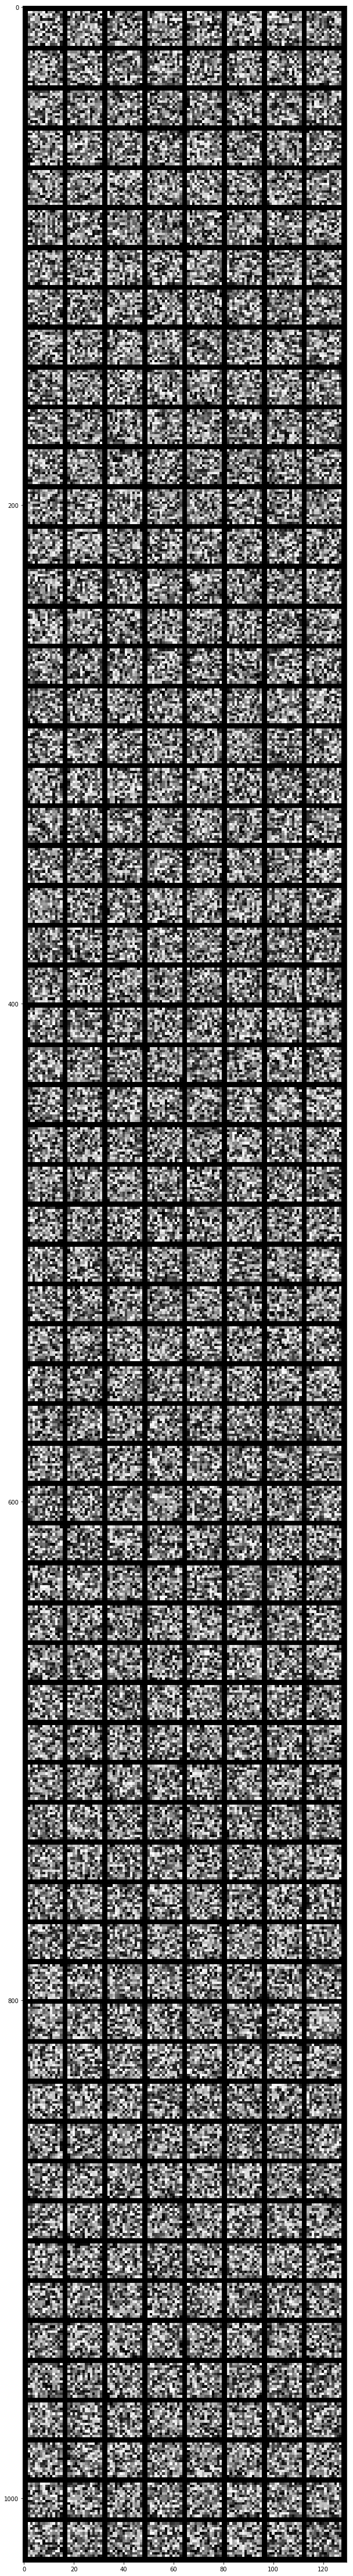

In [33]:
feat1 = model.get_features_for_layer(img_tensor=img1,layer_num=28).squeeze().numpy()
feat2 = model.get_features_for_layer(img_tensor=img2,layer_num=28).squeeze().numpy()
plt.imshow(Utils.get_viz_tensor(torch.from_numpy(feat1)))

In [34]:
# feat1_norm = feat1/(feat1.max()-feat1.min())
# feat2_norm = feat2/(feat2.max() - feat2.min() )

# feat1_norm = feat1/(feat1.max())
# feat2_norm = feat2/(feat2.max() )

feat1_norm = (feat1 - np.mean(feat1))/(np.std(feat1))
feat2_norm = (feat2 - np.mean(feat2))/(np.std(feat2))


feat1_np_t = feat1_norm.transpose(1,2,0)
feat2_np_t = feat2_norm.transpose(1,2,0)

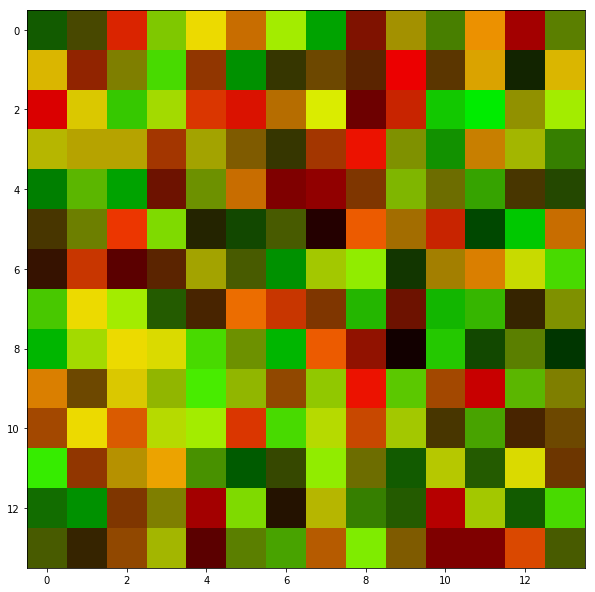

In [54]:
pm = PatchMatchOrig(feat1_np_t,feat1_np_t,feat2_np_t,feat2_np_t, 1)
plt.imshow(pm.visualize())

done iteration 1
done iteration 2
done iteration 3
done iteration 4
done iteration 5
Done


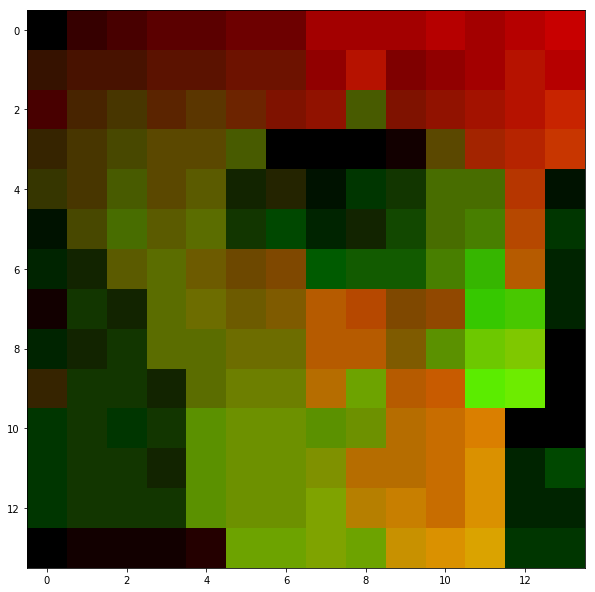

In [55]:
pm.propagate(iters=5,rand_search_radius=6)
plt.imshow(pm.visualize())

In [56]:
img1_raw = Utils.load_image(img_path=img1_path,to_array=False,to_variable=False).numpy().transpose(1,2,0)
img2_raw = Utils.load_image(img_path=img2_path,to_array=False,to_variable=False).numpy().transpose(1,2,0)

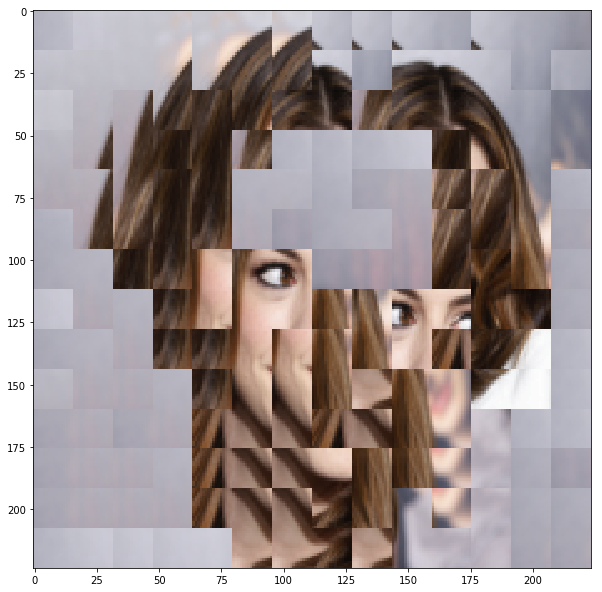

In [57]:
recon = Utils.reconstruct_image(img2_raw,pm=pm)
plt.imshow(Utils.deprocess_image(recon))